In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import tarfile

Matplotlib created a temporary config/cache directory at /scratch/slurm-job.828179/matplotlib-tv3y1lzj because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# File obtained from 
# 1. Filtered kmer list 
# 2. Generation info
# 3. Added a lot of false positive related information in projects2020_ohsu/eth/debug/debug_false_positives/p20230307_filter_allRF_quality_check.ipynb
filter_dir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/chosen_filters_06March_order'
sample_target = 'TCGA-AO-A0JM-01A-21R-A056-07'

metadata = 'metadata2'
path_interest = f'G_{sample_target}_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1{metadata}.tsv.gz'

path = os.path.join(filter_dir, path_interest)
plot_dir = os.path.join(filter_dir, 'plots')
base_plot = path_interest.replace('.tsv.gz', '')

# Plot 1

In [3]:
df = pd.read_csv(path, sep = '\t')
print(f'Reading {path}')
display(df.head())


Reading /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/chosen_filters_06March_order/G_TCGA-AO-A0JM-01A-21R-A056-07_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1metadata2.tsv.gz


,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGAAOA0JM01A21RA05607all,TCGABHA18V01A11RA12D07all,TCGAA2A0D201A21RA03407all,TCGAA2A0SX01A12RA08407all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available
0,KSKTRPISD,NaN,NaN,NaN,NaN,NaN,NaN,16801319:16801333:16795006:16795019:None:None,False,False,...,18.921476,0.0,0.0,0.0,NaN,-,16795019:16801319,False,False,False
1,SKTRPISDS,NaN,NaN,NaN,NaN,NaN,NaN,16801319:16801330:16795003:16795019:None:None,False,False,...,18.921476,0.0,0.0,0.0,NaN,-,16795019:16801319,False,False,False
2,YKSKTRPIS,NaN,NaN,NaN,NaN,NaN,NaN,16801319:16801336:16795009:16795019:None:None,False,False,...,18.921476,0.0,0.0,0.0,NaN,-,16795019:16801319,False,False,False
3,LYKSKTRPI,NaN,NaN,NaN,NaN,NaN,NaN,16801319:16801339:16795012:16795019:None:None,False,False,...,18.921476,0.0,0.0,0.0,NaN,-,16795019:16801319,False,False,False
4,ALYKSKTRP,NaN,NaN,NaN,NaN,NaN,NaN,16801319:16801342:16795015:16795019:None:None,False,False,...,18.921476,0.0,0.0,0.0,NaN,-,16795019:16801319,False,False,False


In [4]:
print(df.columns)


Index(['kmer', 'gtexCohortfilter >0.0', 'gtexCohortfilter >=1.0',
       'gtexCohortfilter >=2.0', 'gtexCohortfilter >=3.0',
       'gtexCohortfilter >=5.0', 'gtexCohortfilter >=10.0', 'coord',
       'junctionAnnotated', 'readFrameAnnotated', 'isCrossJunction', 'batch',
       'cancerCohortfilter >0.0', 'cancerCohortfilter >=1.0',
       'cancerCohortfilter >=2.0', 'cancerCohortfilter >=3.0',
       'cancerCohortfilter >=5.0', 'cancerCohortfilter >=10.0',
       'TCGAC8A12P01A11RA11507all', 'TCGAAOA0JM01A21RA05607all',
       'TCGABHA18V01A11RA12D07all', 'TCGAA2A0D201A21RA03407all',
       'TCGAA2A0SX01A12RA08407all', 'isAnnotated', 'strand',
       'junction_coordinate', 'coordinate_in_GTEX', 'gtexExon2<cancExon2',
       'info_not_available'],
      dtype='object')


In [5]:
recurr_col = 'cancerCohortfilter >0.0'
expr_col = 'TCGAAOA0JM01A21RA05607all'
check_in_gtex_coord = 'coordinate_in_GTEX'
check_exons_length = 'gtexExon2<cancExon2'
jxannot = 'junctionAnnotated'
rfannot = 'readFrameAnnotated'
idx = 'index'
info = 'info_not_available'
df = df.sort_values(by=[recurr_col])
df[idx] = np.arange(len(df))

In [6]:
df[[recurr_col, expr_col, check_in_gtex_coord, check_exons_length, jxannot, rfannot, info, idx]]

,cancerCohortfilter >0.0,TCGAAOA0JM01A21RA05607all,coordinate_in_GTEX,gtexExon2<cancExon2,junctionAnnotated,readFrameAnnotated,info_not_available,index
569,1,4.204772,False,False,True,False,False,0
823,1,4.204772,False,False,False,False,False,1
814,1,4.204772,False,False,False,False,False,2
813,1,4.204772,False,False,False,False,False,3
812,1,4.204772,False,False,False,False,False,4
...,...,...,...,...,...,...,...,...
602,1076,33.638179,True,True,True,False,False,1134
601,1076,33.638179,True,True,True,False,False,1135
1103,1081,18.921476,True,True,True,True,False,1136
239,1101,2617.470829,False,False,False,False,True,1137


In [7]:
#df = df.tail(50)

/scratch/slurm-job.828179/ipykernel_3644808/225351227.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
/scratch/slurm-job.828179/ipykernel_3644808/225351227.py:26: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)
/scratch/slurm-job.828179/ipykernel_3644808/225351227.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


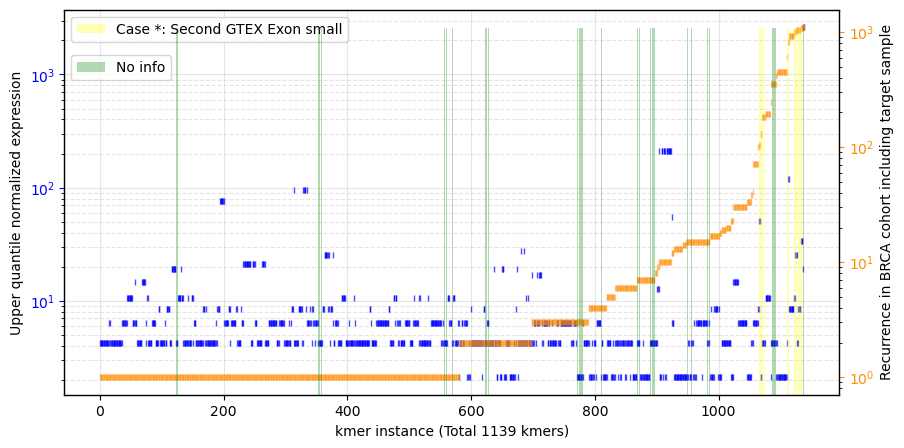

In [8]:
marker_size = 4
color1 = 'blue'
color2 = 'darkorange'
color3 = 'yellow'
color4 = 'green'
colorgrid = 'grey'
alpha_marker1 = 0.7
alpha_marker2 = 0.5
alpha_bar = 0.3
alpha_grid = 0.2

# Figure initialize 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax3 = ax.twinx()
ax4 = ax.twinx()


# Ax 1
df.plot(x=idx, y=expr_col, ax=ax, legend=False, marker='|', alpha=alpha_marker1,
        linestyle = 'None', markerfacecolor=color1, markeredgecolor=color1, markersize=marker_size)
ax.set_ylabel('Upper quantile normalized expression')
ax.tick_params(axis='y', colors=color1)
ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)

# Ax 2
df.plot(x=idx, y=recurr_col, ax=ax2, legend=False, marker="|", alpha=alpha_marker2,
              linestyle = 'None', markerfacecolor='None', markeredgecolor=color2, markersize=marker_size)
ax2.set_ylabel('Recurrence in BRCA cohort including target sample')
ax2.tick_params(axis='y', colors=color2) #, labelsize=14)

# Ax 3
ax3.bar(x=df[idx], height=df[check_exons_length], alpha=alpha_bar, color=color3)
ax3.legend(['Case *: Second GTEX Exon small'], loc='upper left')
ax3.tick_params(axis='y', colors=color3) #, labelsize=14)
ax3.set_yticks([])
ax3.set_yticks([], minor=False)

# Ax 4
ax4.bar(x=df[idx], height=df[info], alpha = alpha_bar, color=color4)
ax4.legend(['No info'], loc="upper left", bbox_to_anchor=(0, 0.9))
ax4.tick_params(axis='y', colors=color4) #, labelsize=14)
ax4.set_yticks([])
ax4.set_yticks([], minor=False)

# All plots
ax.set_xlabel(f'kmer instance (Total {len(df)} kmers)')
ax.set_yscale("log")
ax2.set_yscale("log")
#ax.figure.legend()


save = False
name = 'Recurr_expr'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()

# Plot 2

In [9]:
path_ohsu = 'output/kmer_files/J_TCGA-AO-A0JM-01A-21R-A056-07_SampleLim0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across0.tsv'

tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/Mar9-2023_OHSU_filterresults_realign_all/OHSU_March9-2023_filter_results.tar.gz'

In [10]:
# Read OHSU Data
with tarfile.open(tar_file_OHSU, "r:*") as tar: #OHSU
    df_ohsu = pd.read_csv(tar.extractfile(path_ohsu), header=0, sep="\t")

In [11]:
df.shape

(1139, 30)

In [12]:
# Compute shared kmers across the two pipelines
shared_col = 'shared_across_labs'
shared_kmers = set(df_ohsu['kmer']).intersection(set(df['kmer']))

df_ohsu = df_ohsu.set_index('kmer')
df_ohsu.loc[list(shared_kmers), shared_col] = True
df_ohsu = df_ohsu.reset_index().drop_duplicates()

# Merge to ETH
df = df.merge(df_ohsu, on = 'kmer', how = 'left')
df[shared_col] = df[shared_col].fillna(False)

In [13]:
df.head()

,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGAA2A0D201A21RA03407all,TCGAA2A0SX01A12RA08407all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available,index,shared_across_labs
0,FITTICAIM,NaN,NaN,NaN,NaN,NaN,NaN,172935298:172935310:172950708:172950720:172950...,True,False,...,0.0,0.0,NaN,+,172935310:172950708:172950720:172950963,False,False,False,0,False
1,GSIDTVNKT,NaN,NaN,NaN,NaN,NaN,NaN,30632296:30632305:30632365:30632383:None:None,False,False,...,0.0,0.0,NaN,+,30632305:30632365,False,False,False,1,True
2,IIDGVKGFI,NaN,NaN,NaN,NaN,NaN,NaN,77715861:77715879:77723039:77723048:None:None,False,False,...,0.0,0.0,NaN,+,77715879:77723039,False,False,False,2,True
3,KGFIVLARM,NaN,NaN,NaN,NaN,NaN,NaN,77715876:77715879:77723039:77723063:None:None,False,False,...,0.0,0.0,NaN,+,77715879:77723039,False,False,False,3,True
4,DGVKGFIVL,NaN,NaN,NaN,NaN,NaN,NaN,77715867:77715879:77723039:77723054:None:None,False,False,...,0.0,0.0,NaN,+,77715879:77723039,False,False,False,4,True


/scratch/slurm-job.828179/ipykernel_3644808/2549076078.py:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
/scratch/slurm-job.828179/ipykernel_3644808/2549076078.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)


save to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/chosen_filters_06March_order/plots/G_TCGA-AO-A0JM-01A-21R-A056-07_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1metadata2_Recurr_expr_shareness.pdf


/scratch/slurm-job.828179/ipykernel_3644808/2549076078.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


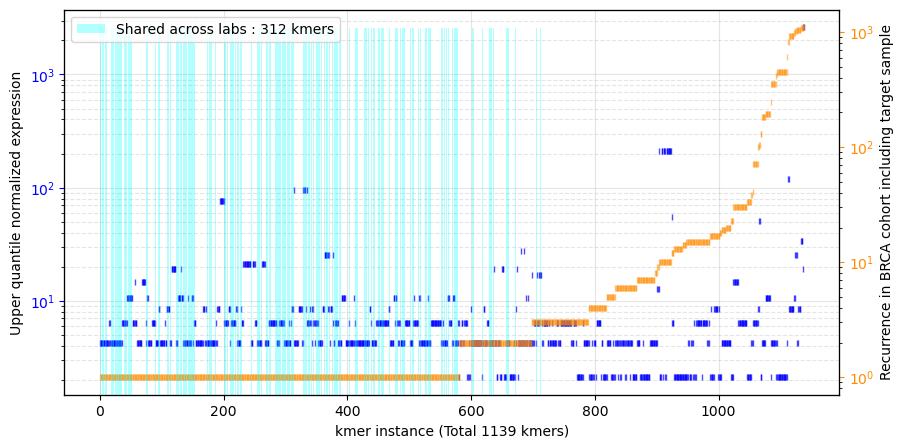

In [15]:
marker_size = 4
color1 = 'blue'
color2 = 'darkorange'
color3 = 'cyan'
color4 = 'green'
colorgrid = 'grey'
alpha_marker1 = 0.7
alpha_marker2 = 0.5
alpha_bar = 0.3
alpha_grid = 0.2

# Figure initialize 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax3 = ax.twinx()


# Ax 1
df.plot(x=idx, y=expr_col, ax=ax, legend=False, marker='|', alpha=alpha_marker1,
        linestyle = 'None', markerfacecolor=color1, markeredgecolor=color1, markersize=marker_size)
ax.set_ylabel('Upper quantile normalized expression')
ax.tick_params(axis='y', colors=color1)
ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)

# Ax 2
df.plot(x=idx, y=recurr_col, ax=ax2, legend=False, marker="|", alpha=alpha_marker2,
              linestyle = 'None', markerfacecolor='None', markeredgecolor=color2, markersize=marker_size)
ax2.set_ylabel('Recurrence in BRCA cohort including target sample')
ax2.tick_params(axis='y', colors=color2) #, labelsize=14)

# Ax 3
ax3.bar(x=df[idx], height=df[shared_col], alpha=alpha_bar, color=color3)
ax3.legend([f'Shared across labs : {len(shared_kmers)} kmers'], loc='upper left')
ax3.tick_params(axis='y', colors=color3) #, labelsize=14)
ax3.set_yticks([])
ax3.set_yticks([], minor=False)

# # Ax 4
# ax4.bar(x=df[idx], height=df[info], alpha = alpha_bar, color=color4)
# ax4.legend(['No info'], loc="upper left", bbox_to_anchor=(0, 0.9))
# ax4.tick_params(axis='y', colors=color4) #, labelsize=14)
# ax4.set_yticks([])
# ax4.set_yticks([], minor=False)

# All plots
ax.set_xlabel(f'kmer instance (Total {len(df)} kmers)')
ax.set_yscale("log")
ax2.set_yscale("log")
#ax.figure.legend()


save = True
name = 'Recurr_expr_shareness'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()